# **Food Delivery Time Prediction Model**

In today's fast-paced world, waiting for a food delivery can feel like an eternity. This project tackles that frustration by building a machine learning model to predict food delivery times.

This project utilizes historical delivery data to identify patterns that influence delivery time. Factors like distance, traffic conditions, and even weather can be incorporated into the model. By analyzing these factors, the model learns to predict how long a specific delivery will take, giving you peace of mind and a more enjoyable dining experience.

The dataset used here is a cleaned version of the original dataset submitted by Gaurav Malik on Kaggle. Below are all the features in the dataset:

*ID: order ID number*

*Delivery_person_ID: ID number of the delivery partner*

*Delivery_person_Age: Age of the delivery partner*

*Delivery_person_Ratings: ratings of the delivery partner based on past deliveries*

*Restaurant_latitude: The latitude of the restaurant*

*Restaurant_longitude: The longitude of the restaurant*

*Delivery_location_latitude: The latitude of the delivery location*

*Delivery_location_longitude: The longitude of the delivery location*

*Order_Date: Date of the order*

*Time_Orderd: The time at which the order was placed*

*Time_Order_picked: The time at which the order was picked by the delivery partner*

*Weatherconditions: The weather conditions at the time of the order*

*Road_traffic_density: The density of road traffic faced by the delivery partner*

*Vehicle_condition: The condition of the vehicle used by the delivery partner*

*Type_of_order: The type of meal ordered by the customer*

*Type_of_vehicle: The type of vehicle delivery partner rides*

*multiple_deliveries: The no. of deliveries taken up by the delivery partner*

*Festival: If a festival is there or not*

*City: The city of the order*

*Time_taken(min): The time taken by the delivery partner to complete the order*

The objective is to predict the delivery time based on the distance covered by the delivery partner to deliver the order.

**Importing the libraries**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

**Data Preprocessing and Exploratory Data Analysis**

In [ ]:
data_train = pd.read_csv('train.csv')
data_train.head()

In [81]:
data_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'distance'],
      dtype='object')

In [82]:
data_train.describe()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,...,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,22796.000000,753.127037,11.023754,22.575966,17.017729,70.231332,17.465186,70.845702,21.371373,112.054614,...,3.129143,1.762156,1.023359,1.509815,2.248415,0.815564,1.014651,0.700458,16.294607,98.726011
std,13161.709748,376.057898,6.091398,3.338151,8.185109,22.883647,7.335122,21.118812,12.850682,51.322115,...,2.103939,0.966799,0.839065,1.118327,0.602468,0.739168,0.156329,1.245365,9.383806,1099.922892
min,0.000000,0.000000,0.000000,0.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11398.000000,400.000000,6.000000,22.000000,12.933284,73.170000,12.988453,73.280000,10.000000,86.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,9.000000,4.000000
50%,22796.000000,705.000000,11.000000,23.000000,18.546947,75.898497,18.633934,76.002574,21.000000,125.000000,...,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,16.000000,9.000000
75%,34194.000000,1105.000000,16.000000,25.000000,22.728163,78.044095,22.785049,78.107044,33.000000,152.000000,...,5.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,22.000000,13.000000
max,45592.000000,1319.000000,22.000000,28.000000,30.914057,88.433452,31.054057,88.563452,43.000000,176.000000,...,6.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,44.000000,19709.000000


In [83]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  int64  
 1   Delivery_person_ID           45593 non-null  int64  
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  int64  
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  int64  
 9   Time_Orderd                  45593 non-null  int64  
 10  Time_Order_picked            45593 non-null  int64  
 11  Weatherconditions            45593 non-null  int64  
 12  Road_traffic_density         45593 non-null  int64  
 13  Vehicle_conditio

In [84]:
data_train.shape

(45593, 21)

In [85]:
from geopy.distance import geodesic

In [86]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")

calculate_distance(data_train)
data_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,11169,637,18,25,22.745049,75.892471,22.765049,75.912471,32,38,...,5,0,2,3,2,0,1,3,14,3
1,34966,232,15,21,12.913041,77.683237,13.043041,77.813237,37,129,...,4,1,2,3,3,1,1,0,23,20
2,16266,234,4,20,12.914264,77.678400,12.924264,77.688400,32,5,...,3,2,0,1,2,1,1,3,16,1
3,22585,397,19,23,11.003669,76.976494,11.053669,77.026494,9,110,...,5,3,0,0,2,1,1,0,11,7
4,20450,333,13,22,12.972793,80.249982,13.012793,80.289982,38,60,...,0,0,1,3,3,1,1,0,20,6


In [87]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(data_train)
data_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,11169,637,18,25,22.745049,75.892471,22.765049,75.912471,32,38,...,5,0,2,3,2,0,1,3,14,3
1,34966,232,15,21,12.913041,77.683237,13.043041,77.813237,37,129,...,4,1,2,3,3,1,1,0,23,20
2,16266,234,4,20,12.914264,77.678400,12.924264,77.688400,32,5,...,3,2,0,1,2,1,1,3,16,1
3,22585,397,19,23,11.003669,76.976494,11.053669,77.026494,9,110,...,5,3,0,0,2,1,1,0,11,7
4,20450,333,13,22,12.972793,80.249982,13.012793,80.289982,38,60,...,0,0,1,3,3,1,1,0,20,6


In [88]:
data_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,11169,637,18,25,22.745049,75.892471,22.765049,75.912471,32,38,...,5,0,2,3,2,0,1,3,14,3
1,34966,232,15,21,12.913041,77.683237,13.043041,77.813237,37,129,...,4,1,2,3,3,1,1,0,23,20
2,16266,234,4,20,12.914264,77.678400,12.924264,77.688400,32,5,...,3,2,0,1,2,1,1,3,16,1
3,22585,397,19,23,11.003669,76.976494,11.053669,77.026494,9,110,...,5,3,0,0,2,1,1,0,11,7
4,20450,333,13,22,12.972793,80.249982,13.012793,80.289982,38,60,...,0,0,1,3,3,1,1,0,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,22948,672,11,24,26.902328,75.794257,26.912328,75.804257,36,39,...,6,0,1,2,2,0,1,0,22,1
45589,42571,45,2,22,0.000000,0.000000,0.070000,0.070000,26,131,...,6,1,0,0,2,1,1,0,26,10
45590,13234,326,11,25,13.022394,80.242439,13.052394,80.272439,17,174,...,0,2,1,1,3,0,1,0,6,4
45591,16602,390,1,23,11.001753,76.986241,11.041753,77.026241,12,61,...,0,0,0,3,2,1,1,0,16,6


In [89]:
pred_df = data_train.copy()
pred_df = pred_df.drop(columns = ['ID', 'Delivery_person_ID','Order_Date'] )
pred_df.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,18,25,22.745049,75.892471,22.765049,75.912471,38,46,5,0,2,3,2,0,1,3,14,3
1,15,21,12.913041,77.683237,13.043041,77.813237,129,143,4,1,2,3,3,1,1,0,23,20
2,4,20,12.914264,77.678400,12.924264,77.688400,5,10,3,2,0,1,2,1,1,3,16,1
3,19,23,11.003669,76.976494,11.053669,77.026494,110,123,5,3,0,0,2,1,1,0,11,7
4,13,22,12.972793,80.249982,13.012793,80.289982,60,70,0,0,1,3,3,1,1,0,20,6


Time taken vs Distance

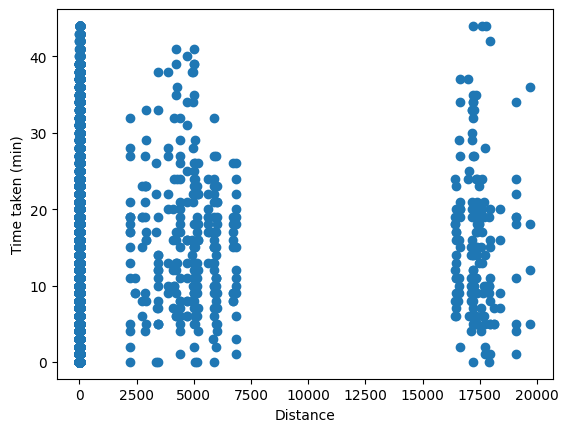

In [90]:
import matplotlib.pyplot as plt
plt.scatter(pred_df['distance'], pred_df['Time_taken(min)'])
plt.xlabel('Distance')
_ = plt.ylabel('Time taken (min)')

Delivery person age vs ratings

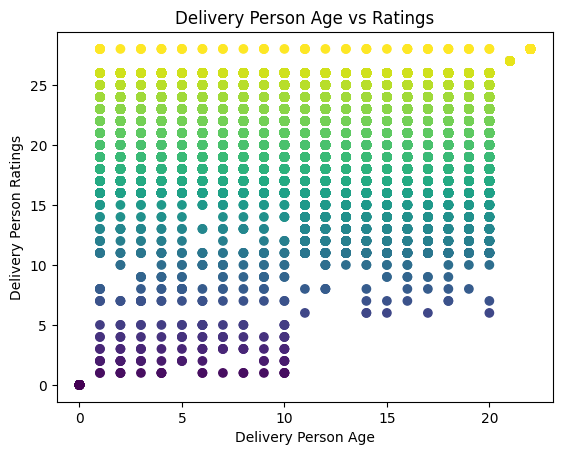

In [91]:
import matplotlib.pyplot as plt
plt.scatter(pred_df['Delivery_person_Age'], pred_df['Delivery_person_Ratings'], c=pred_df['Delivery_person_Ratings'])
plt.xlabel('Delivery Person Age')
plt.ylabel('Delivery Person Ratings')
_ = plt.title('Delivery Person Age vs Ratings')

Average Delivery Time vs Distance

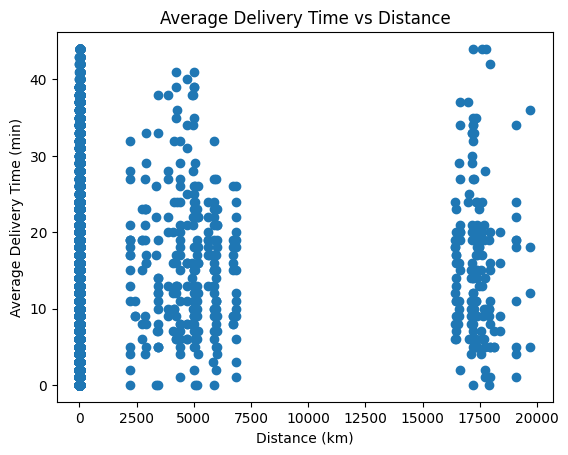

In [92]:
import matplotlib.pyplot as plt

plt.scatter(pred_df['distance'], pred_df['Time_taken(min)'])
plt.xlabel('Distance (km)')
plt.ylabel('Average Delivery Time (min)')
_ = plt.title('Average Delivery Time vs Distance')


Delivery Person Ratings over Time

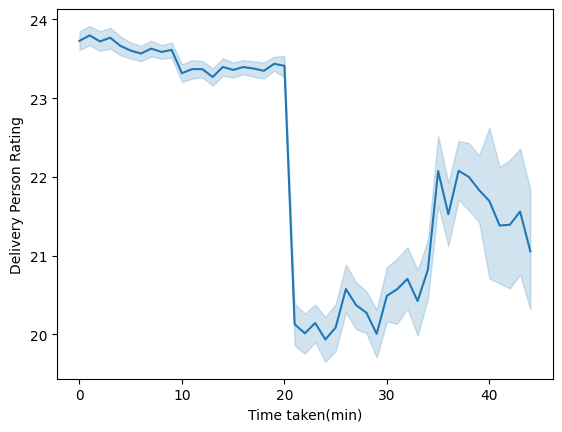

In [93]:
import matplotlib.pyplot as plt
sns.lineplot(x=pred_df['Time_taken(min)'], y=pred_df['Delivery_person_Ratings'] )
plt.xlabel("Time taken(min)")
_ = plt.ylabel("Delivery Person Rating")

In [94]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken(min)']
for col in num_cols:
    pred_df[col]=pred_df[col].astype('float64')


In [95]:
pred_df = pd.get_dummies(pred_df,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pred_df = pd.get_dummies(pred_df,columns = ['Festival'], drop_first=True)


features = pred_df.drop('Time_taken(min)', axis =1)
label = pred_df['Time_taken(min)'].copy()

**Model Building and Evaluation**

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)


print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31915, 37) (13678, 37) (31915,) (13678,)


In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt



model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

models = {'Linear Regression':model_lr, 'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr,
          'Decision Tree Regressor': model_dtr}

for i in models.keys():
  print(i)
  models[i].fit(x_train, y_train)
  y_pred = models[i].predict(x_test)
  print("Training Accuracy: ", (models[i].score(x_train, y_train)*100))
  print("Testing Accuracy: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))

  print('--------------------------------------')

Linear Regression
Training Accuracy:  54.69941781545005
Testing Accuracy:  54.61740048615052
RMSE value:  6.311216948319232
--------------------------------------
Random Forest Regression
Training Accuracy:  97.43132707796713
Testing Accuracy:  81.49720040680496
RMSE value:  4.029833914187054
--------------------------------------
Gradient Boosting Regressor
Training Accuracy:  76.56102033389134
Testing Accuracy:  76.36415141366241
RMSE value:  4.554639671570001
--------------------------------------
Decision Tree Regressor
Training Accuracy:  100.0
Testing Accuracy:  66.05293230379571
RMSE value:  5.458452787052728
--------------------------------------


It is clear from the above observations that Random Forest Regressor
has lowest RMSE and highest accuracy on testing data so, it is the best model.

In [98]:
print('Random Forest Regression')
print("Training Accuracy: ", (model_rf.score(x_train, y_train)*100))
print("Testing Accuracy: ", model_rf.score(x_test, y_test)*100)
print("Root Mean Squared error (RMSE) value: ", sqrt(mean_squared_error(y_test, y_pred)))
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pred_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

Random Forest Regression
Training Accuracy:  97.43132707796713
Testing Accuracy:  81.49720040680496
Root Mean Squared error (RMSE) value:  5.458452787052728


,Delivery_person_Ratings,actual,predicted
5137,22.0,14.0,10.88
13035,22.0,17.0,15.58
38571,26.0,18.0,15.33
22939,25.0,16.0,14.42
22496,13.0,22.0,26.06
14976,22.0,4.0,2.60
14320,25.0,16.0,13.34
15673,22.0,19.0,14.93
26529,28.0,26.0,30.97
13825,22.0,17.0,14.55
